# **Five Days Forex Price Prediction**

#**Using Model** 
####RNN(Recurrent Neural Network)
####LSTM(Long Short Term Memory)
####GRU(Gated Recurrent Unit)


In [1]:
import numpy
import pandas
import pandas as pd
import pandas as np
import numpy as np
import csv
import math
import datetime
import scipy
import tqdm
import keras
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
import seaborn as seabornInstance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import SimpleRNN
from keras.layers.recurrent import GRU
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
%matplotlib inline
#import matplotlib.cbook as cbook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
from tqdm import tqdm_notebook
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

Using TensorFlow backend.


In [2]:
df = pd.read_csv('EURUSD_Price.csv', parse_dates=True, index_col=0)
df.head()

Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2003-12-01  1.203398  1.204007  1.194401  1.196501   1.196501     0.0
2003-12-02  1.196101  1.210903  1.194600  1.208897   1.208897     0.0
2003-12-03  1.209000  1.213003  1.207700  1.212298   1.212298     0.0
2003-12-04  1.212004  1.214403  1.204398  1.208094   1.208094     0.0
2003-12-05  1.207802  1.219096  1.206593  1.218695   1.218695     0.0

In [3]:
agg_dict = {'Open': 'first',
          'High': 'max',
          'Low': 'min',
          'Close': 'last',
          'Adj Close': 'last',
          'Volume': 'mean'}

# resampled dataframe
# 'W' means weekly aggregation
df_1_5d = df.resample('5D').agg(agg_dict)

In [4]:
print(df_1_5d.head(10))
print('---------')
print(df_1_5d.tail(10))


                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2003-12-01  1.203398  1.219096  1.194401  1.218695   1.218695     0.0
2003-12-06  1.216797  1.227702  1.215407  1.219096   1.219096     0.0
2003-12-11  1.219096  1.232499  1.212298  1.231997   1.231997     0.0
2003-12-16  1.231406  1.244199  1.229997  1.238497   1.238497     0.0
2003-12-21  1.235697  1.267202  1.235697  1.244803   1.244803     0.0
2003-12-26  1.245004  1.256297  1.242699  1.254894   1.254894     0.0
2003-12-31  1.255004  1.264894  1.247396  1.258194   1.258194     0.0
2004-01-05  1.263903  1.286703  1.256502  1.285892   1.285892     0.0
2004-01-10  1.284802  1.289707  1.240602  1.265102   1.265102     0.0
2004-01-15  1.265599  1.267106  1.234004  1.235407   1.235407     0.0
---------
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2021-06-09

In [5]:
df_1_5d.shape

(1290, 6)

In [6]:
df_1_5d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1290 entries, 2003-12-01 to 2021-07-24
Freq: 5D
Data columns (total 6 columns):
Open         1281 non-null float64
High         1281 non-null float64
Low          1281 non-null float64
Close        1281 non-null float64
Adj Close    1281 non-null float64
Volume       1281 non-null float64
dtypes: float64(6)
memory usage: 110.5 KB


In [7]:
df_1_5d.describe()

Open         High          Low        Close    Adj Close  Volume
count  1281.000000  1281.000000  1281.000000  1281.000000  1281.000000  1281.0
mean      1.258997     1.269054     1.247424     1.259127     1.259127     0.0
std       0.119869     0.121575     0.122750     0.120030     0.120030     0.0
min       1.042753     1.048196     0.072902     1.039047     1.039047     0.0
25%       1.161009     1.168170     1.152804     1.161494     1.161494     0.0
50%       1.255004     1.267106     1.243394     1.257071     1.257071     0.0
75%       1.342913     1.352686     1.332131     1.342895     1.342895     0.0
max       1.598184     1.602821     1.580603     1.598798     1.598798     0.0

In [8]:
def num_missing(x):
    return sum(x.isnull())

print("Missing values per column:")
print(df_1_5d.apply(num_missing, axis=0))

print("\nMissing values per row:")
print(df_1_5d.apply(num_missing, axis=1).head())

Missing values per column:
Open         9
High         9
Low          9
Close        9
Adj Close    9
Volume       9
dtype: int64

Missing values per row:
Date
2003-12-01    0
2003-12-06    0
2003-12-11    0
2003-12-16    0
2003-12-21    0
Freq: 5D, dtype: int64


In [10]:
df_1_5d["Open"].fillna("1.258997", inplace = True)
df_1_5d["High"].fillna("1.269054", inplace = True)
df_1_5d["Low"].fillna("1.247424", inplace = True)
df_1_5d["Close"].fillna("1.259127", inplace = True)
df_1_5d["Adj Close"].fillna("1.259127", inplace = True)
df_1_5d["Volume"].fillna("0.0", inplace = True)
print(df_1_5d.head(10))
print(df_1_5d.tail(10))

               Open     High      Low    Close Adj Close Volume
Date                                                           
2003-12-01   1.2034   1.2191   1.1944   1.2187    1.2187      0
2003-12-06   1.2168   1.2277  1.21541   1.2191    1.2191      0
2003-12-11   1.2191   1.2325   1.2123    1.232     1.232      0
2003-12-16  1.23141   1.2442     1.23   1.2385    1.2385      0
2003-12-21   1.2357   1.2672   1.2357   1.2448    1.2448      0
2003-12-26    1.245   1.2563   1.2427  1.25489   1.25489      0
2003-12-31    1.255  1.26489   1.2474  1.25819   1.25819      0
2004-01-05   1.2639   1.2867   1.2565  1.28589   1.28589      0
2004-01-10   1.2848  1.28971   1.2406   1.2651    1.2651      0
2004-01-15   1.2656  1.26711    1.234  1.23541   1.23541      0
               Open     High      Low    Close Adj Close Volume
Date                                                           
2021-06-09  1.21718   1.2219   1.2095  1.21726   1.21726      0
2021-06-14  1.21108  1.21492  1.18511  1

In [12]:
def num_missing(x):
    return sum(x.isnull())

print("Missing values per column:")
print(df_1_5d.apply(num_missing, axis=0))

print("\nMissing values per row:")
print(df_1_5d.apply(num_missing, axis=1).head())

Missing values per column:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values per row:
Date
2003-12-01    0
2003-12-06    0
2003-12-11    0
2003-12-16    0
2003-12-21    0
Freq: 5D, dtype: int64


In [14]:
df_1_5d.shape

(1290, 6)

**Open, High, Low, Close Price History in Plot**

C:\Users\Polash Dey\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


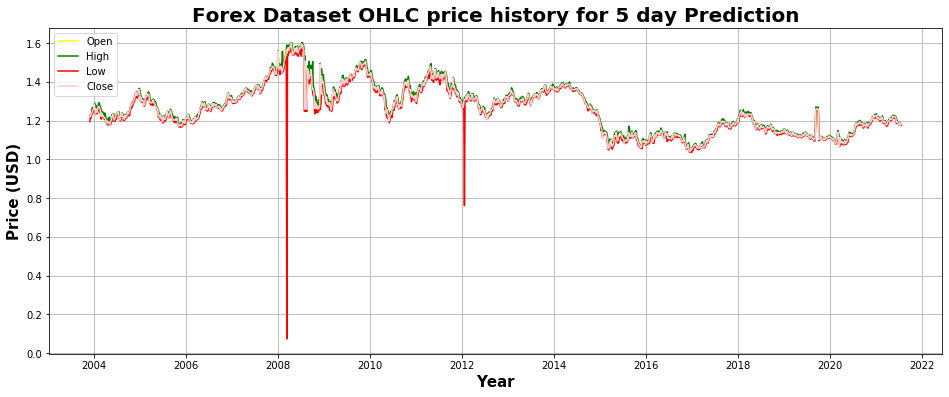

In [15]:
#plt.figure()
plt.figure(figsize = (16,6), facecolor = '#ffffff')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#ffffff')
plt.plot(df_1_5d["Open"], color = 'yellow')
plt.plot(df_1_5d["High"], color = 'green')
plt.plot(df_1_5d["Low"], color = 'red')
plt.plot(df_1_5d["Close"],color = '#ffcdd2')
plt.title('Forex Dataset OHLC price history for 5 day Prediction',fontsize=20,fontweight = "bold")
plt.ylabel('Price (USD)', fontsize=15,fontweight = "bold")
plt.xlabel('Year',fontsize=15,fontweight = "bold")
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.grid()
plt.show()

**Volume History in Plot**

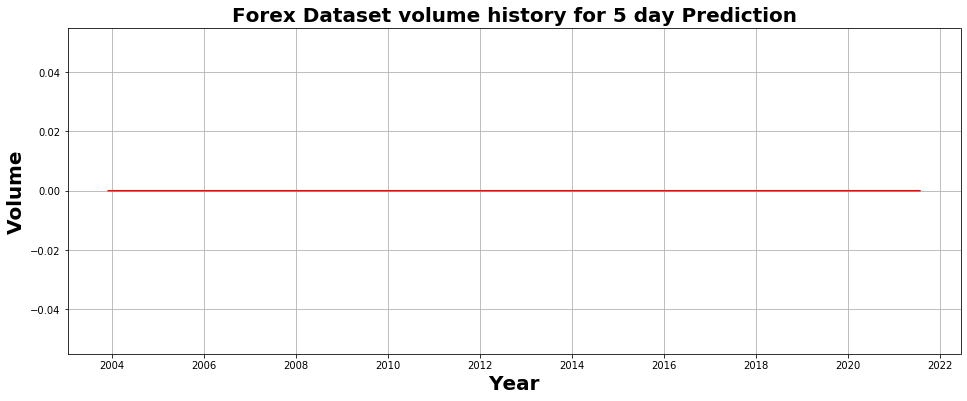

In [16]:
#plt.figure()
plt.figure(figsize = (16,6), facecolor = '#ffffff')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#ffffff')
plt.plot(df_1_5d["Volume"], color = 'red')
plt.title('Forex Dataset volume history for 5 day Prediction', fontsize=20,fontweight = "bold")
plt.ylabel('Volume', fontsize=20,fontweight = "bold")
plt.xlabel('Year', fontsize=20,fontweight = "bold")
plt.grid()
plt.show()

**Closing Price History**

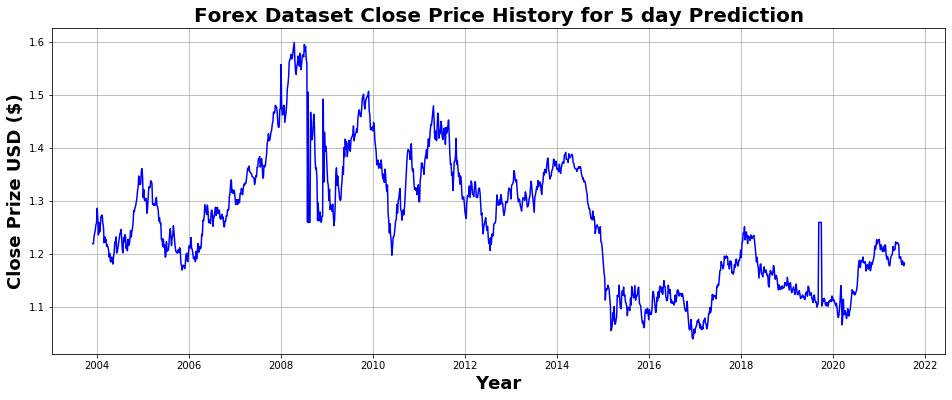

In [17]:
plt.figure(figsize = (16,6), facecolor = '#ffffff')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#ffffff')
plt.title('Forex Dataset Close Price History for 5 day Prediction',fontsize=20,fontweight = "bold")
plt.plot(df_1_5d['Close'], color = 'blue')
plt.xlabel("Year" , fontsize = 18, fontweight = "bold")
plt.ylabel("Close Prize USD ($)" , fontsize = 18, fontweight = "bold")
plt.grid()
plt.show()

#plt.plot(y_test, color = 'red', label = 'Real HMC Stock Price')

In [18]:
training_1 = df_1_5d[df_1_5d.index < datetime.datetime(year=2018, month=1, day=11)]
training_1

Open     High      Low    Close Adj Close Volume
Date                                                           
2003-12-01   1.2034   1.2191   1.1944   1.2187    1.2187      0
2003-12-06   1.2168   1.2277  1.21541   1.2191    1.2191      0
2003-12-11   1.2191   1.2325   1.2123    1.232     1.232      0
2003-12-16  1.23141   1.2442     1.23   1.2385    1.2385      0
2003-12-21   1.2357   1.2672   1.2357   1.2448    1.2448      0
...             ...      ...      ...      ...       ...    ...
2017-12-17  1.17467  1.19012  1.17431  1.18782   1.18782      0
2017-12-22  1.18516   1.1885  1.18175  1.18725   1.18725      0
2017-12-27   1.1861  1.20228  1.18556  1.19417   1.19417      0
2018-01-01   1.2005  1.20919   1.1999  1.20688   1.20688      0
2018-01-06  1.20395   1.2054   1.1918  1.19293   1.19293      0

[1031 rows x 6 columns]

In [19]:
testing_1 = df_1_5d[df_1_5d.index >= datetime.datetime(year=2018, month=1, day=11)]
testing_1

Open     High      Low    Close Adj Close Volume
Date                                                           
2018-01-11  1.19549   1.2299  1.19312  1.21923   1.21923      0
2018-01-16  1.22699  1.23215  1.21751  1.22366   1.22366      0
2018-01-21  1.22559  1.25299  1.22146  1.23911   1.23911      0
2018-01-26  1.23923  1.24902  1.23369  1.23811   1.23811      0
2018-01-31  1.24083   1.2518  1.23865    1.251     1.251      0
...             ...      ...      ...      ...       ...    ...
2021-07-04  1.18559  1.18963  1.17824  1.17934   1.17934      0
2021-07-09  1.18469  1.18821  1.17934  1.18652   1.18652      0
2021-07-14  1.17744  1.18511  1.17726  1.18118   1.18118      0
2021-07-19  1.18115  1.18298  1.17536  1.17727   1.17727      0
2021-07-24   1.1773  1.18245  1.17646  1.18245   1.18245      0

[259 rows x 6 columns]

**Forex Training & Testing Combination for 5 Day**

<function matplotlib.pyplot.show(*args, **kw)>

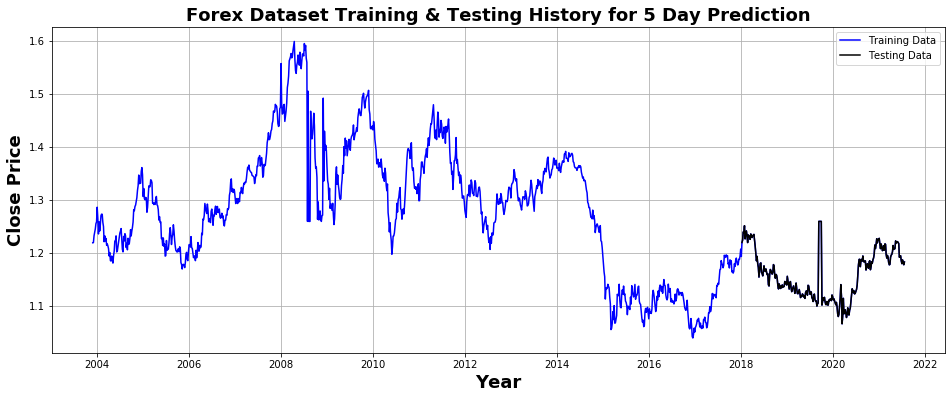

In [26]:
plt.figure(figsize = (16,6), facecolor = '#ffffff')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#ffffff')
training_1, testing_1 =  df_1_5d[ df_1_5d.index < datetime.datetime(year=2018, month=1, day=11)],  df_1_5d[ df_1_5d.index >= datetime.datetime(year=2018, month=1, day=11)]
#plt.figure(figsize=(12,7))
plt.title('Forex Dataset Training & Testing History for 5 Day Prediction', fontsize = 18,fontweight = "bold")
plt.xlabel('Year' , fontsize = 18,fontweight = "bold")
plt.ylabel('Close Price', fontsize = 18,fontweight = "bold")
plt.plot( df_1_5d['Close'], 'blue', label='Training Data')
plt.plot(testing_1['Close'], 'black', label='Testing Data')
#plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()
plt.grid()
plt.show

In [27]:
training_length_1 = training_1.filter(['Close'])
training_length_1

Close
Date               
2003-12-01   1.2187
2003-12-06   1.2191
2003-12-11    1.232
2003-12-16   1.2385
2003-12-21   1.2448
...             ...
2017-12-17  1.18782
2017-12-22  1.18725
2017-12-27  1.19417
2018-01-01  1.20688
2018-01-06  1.19293

[1031 rows x 1 columns]

In [28]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date               
2018-01-11  1.21923
2018-01-16  1.22366
2018-01-21  1.23911
2018-01-26  1.23811
2018-01-31    1.251
...             ...
2021-07-04  1.17934
2021-07-09  1.18652
2021-07-14  1.18118
2021-07-19  1.17727
2021-07-24  1.18245

[259 rows x 1 columns]

In [29]:
sc = MinMaxScaler(feature_range=(0,1))
training_length_scaled_1 = sc.fit_transform(training_length_1)
training_length_scaled_1

array([[0.3209427 ],
       [0.32165909],
       [0.34470684],
       ...,
       [0.27713215],
       [0.29984225],
       [0.27491867]])

In [30]:
X_train_1 = []
y_train_1 = []
#length_1 = len(testing_length_1)
for i in range(30, 1031):
    X_train_1.append(training_length_scaled_1[i-30:i, 0])
    y_train_1.append(training_length_scaled_1[i, 0])
X_train_1, y_train_1 = np.array(X_train_1), np.array(y_train_1)
print (X_train_1[0])
print ('\n')
print (y_train_1[0])

[0.3209427  0.32165909 0.34470684 0.35631915 0.36758487 0.38561253
 0.39150801 0.44099073 0.40384921 0.35079884 0.39170631 0.36079614
 0.38311142 0.4126031  0.41759997 0.41708009 0.38972686 0.37580996
 0.32453001 0.34454427 0.32756887 0.33560815 0.31237997 0.31720712
 0.31058989 0.30130004 0.27647115 0.28806737 0.26075166 0.25949753]


0.276113843476832


In [31]:
X_train_1.shape

(1001, 30)

In [32]:
X_train_1 = np.reshape(X_train_1, (X_train_1.shape[0], X_train_1.shape[1], 1))
X_train_1.shape

(1001, 30, 1)

**Build RNN Model**

In [33]:
#The RNN Model Build
regressorRNN_1 = Sequential()
regressorRNN_1.add(SimpleRNN(units=64, return_sequences=True, input_shape=(X_train_1.shape[1],1)))
regressorRNN_1.add(Dropout(0.2))
regressorRNN_1.add(SimpleRNN(units=64))
regressorRNN_1.add(Dropout(0.2))
regressorRNN_1.add(Dense(units=1, activation='relu'))
# Compiling the RNN
regressorRNN_1.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorRNN_1.summary()

# Fitting to the training set
history_1 = regressorRNN_1.fit(X_train_1,y_train_1,epochs=100,batch_size=64)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 30, 64)            4224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1001/1001 [==============================] - ETA: 20s - loss: 0.1748 - mae: 0.3514 - mse: 0.17 - ETA: 10

1001/1001 [==============================] - ETA: 0s - loss: 0.0134 - mae: 0.0875 - mse: 0.013 - ETA: 0s - loss: 0.0138 - mae: 0.0880 - mse: 0.013 - ETA: 0s - loss: 0.0113 - mae: 0.0788 - mse: 0.011 - ETA: 0s - loss: 0.0114 - mae: 0.0777 - mse: 0.011 - ETA: 0s - loss: 0.0109 - mae: 0.0765 - mse: 0.010 - ETA: 0s - loss: 0.0111 - mae: 0.0766 - mse: 0.011 - ETA: 0s - loss: 0.0107 - mae: 0.0750 - mse: 0.010 - ETA: 0s - loss: 0.0105 - mae: 0.0747 - mse: 0.010 - ETA: 0s - loss: 0.0105 - mae: 0.0750 - mse: 0.010 - ETA: 0s - loss: 0.0103 - mae: 0.0745 - mse: 0.010 - 1s 768us/step - loss: 0.0105 - mae: 0.0750 - mse: 0.0105
Epoch 12/100
1001/1001 [==============================] - ETA: 0s - loss: 0.0063 - mae: 0.0600 - mse: 0.006 - ETA: 0s - loss: 0.0118 - mae: 0.0731 - mse: 0.011 - ETA: 0s - loss: 0.0109 - mae: 0.0726 - mse: 0.010 - ETA: 0s - loss: 0.0101 - mae: 0.0704 - mse: 0.010 - ETA: 0s - loss: 0.0102 - mae: 0.0731 - mse: 0.010 - ETA: 0s - loss: 0.0099 - mae: 0.0730 - mse: 0.009 - ETA: 0s 

1001/1001 [==============================] - ETA: 0s - loss: 0.0062 - mae: 0.0606 - mse: 0.006 - ETA: 0s - loss: 0.0054 - mae: 0.0560 - mse: 0.005 - ETA: 0s - loss: 0.0054 - mae: 0.0562 - mse: 0.005 - ETA: 0s - loss: 0.0055 - mae: 0.0557 - mse: 0.005 - ETA: 0s - loss: 0.0053 - mae: 0.0549 - mse: 0.005 - ETA: 0s - loss: 0.0052 - mae: 0.0542 - mse: 0.005 - ETA: 0s - loss: 0.0052 - mae: 0.0543 - mse: 0.005 - ETA: 0s - loss: 0.0050 - mae: 0.0537 - mse: 0.005 - 1s 714us/step - loss: 0.0051 - mae: 0.0540 - mse: 0.0051
Epoch 25/100
1001/1001 [==============================] - ETA: 0s - loss: 0.0056 - mae: 0.0559 - mse: 0.005 - ETA: 0s - loss: 0.0051 - mae: 0.0543 - mse: 0.005 - ETA: 0s - loss: 0.0052 - mae: 0.0527 - mse: 0.005 - ETA: 0s - loss: 0.0050 - mae: 0.0520 - mse: 0.005 - ETA: 0s - loss: 0.0047 - mae: 0.0506 - mse: 0.004 - ETA: 0s - loss: 0.0051 - mae: 0.0522 - mse: 0.005 - ETA: 0s - loss: 0.0050 - mae: 0.0516 - mse: 0.005 - ETA: 0s - loss: 0.0048 - mae: 0.0502 - mse: 0.004 - ETA: 0s 

1001/1001 [==============================] - ETA: 0s - loss: 0.0049 - mae: 0.0491 - mse: 0.004 - ETA: 0s - loss: 0.0042 - mae: 0.0457 - mse: 0.004 - ETA: 0s - loss: 0.0037 - mae: 0.0450 - mse: 0.003 - ETA: 0s - loss: 0.0040 - mae: 0.0462 - mse: 0.004 - ETA: 0s - loss: 0.0040 - mae: 0.0462 - mse: 0.004 - ETA: 0s - loss: 0.0039 - mae: 0.0454 - mse: 0.003 - ETA: 0s - loss: 0.0039 - mae: 0.0455 - mse: 0.003 - ETA: 0s - loss: 0.0040 - mae: 0.0458 - mse: 0.004 - ETA: 0s - loss: 0.0039 - mae: 0.0459 - mse: 0.003 - ETA: 0s - loss: 0.0040 - mae: 0.0462 - mse: 0.004 - 1s 750us/step - loss: 0.0043 - mae: 0.0467 - mse: 0.0043
Epoch 39/100
1001/1001 [==============================] - ETA: 0s - loss: 0.0040 - mae: 0.0481 - mse: 0.004 - ETA: 0s - loss: 0.0032 - mae: 0.0435 - mse: 0.003 - ETA: 0s - loss: 0.0034 - mae: 0.0435 - mse: 0.003 - ETA: 0s - loss: 0.0036 - mae: 0.0447 - mse: 0.003 - ETA: 0s - loss: 0.0039 - mae: 0.0459 - mse: 0.003 - ETA: 0s - loss: 0.0040 - mae: 0.0463 - mse: 0.004 - ETA: 0s 

1001/1001 [==============================] - ETA: 0s - loss: 0.0034 - mae: 0.0448 - mse: 0.003 - ETA: 0s - loss: 0.0034 - mae: 0.0436 - mse: 0.003 - ETA: 0s - loss: 0.0043 - mae: 0.0461 - mse: 0.004 - ETA: 0s - loss: 0.0048 - mae: 0.0465 - mse: 0.004 - ETA: 0s - loss: 0.0043 - mae: 0.0449 - mse: 0.004 - ETA: 0s - loss: 0.0040 - mae: 0.0436 - mse: 0.004 - ETA: 0s - loss: 0.0038 - mae: 0.0426 - mse: 0.003 - ETA: 0s - loss: 0.0037 - mae: 0.0424 - mse: 0.003 - 1s 704us/step - loss: 0.0038 - mae: 0.0428 - mse: 0.0038
Epoch 52/100
1001/1001 [==============================] - ETA: 0s - loss: 0.0052 - mae: 0.0500 - mse: 0.005 - ETA: 0s - loss: 0.0041 - mae: 0.0455 - mse: 0.004 - ETA: 0s - loss: 0.0038 - mae: 0.0450 - mse: 0.003 - ETA: 0s - loss: 0.0039 - mae: 0.0456 - mse: 0.003 - ETA: 0s - loss: 0.0041 - mae: 0.0464 - mse: 0.004 - ETA: 0s - loss: 0.0037 - mae: 0.0446 - mse: 0.003 - ETA: 0s - loss: 0.0035 - mae: 0.0435 - mse: 0.003 - ETA: 0s - loss: 0.0034 - mae: 0.0431 - mse: 0.003 - 1s 720us

Epoch 66/100
1001/1001 [==============================] - ETA: 0s - loss: 0.0043 - mae: 0.0511 - mse: 0.004 - ETA: 0s - loss: 0.0032 - mae: 0.0433 - mse: 0.003 - ETA: 0s - loss: 0.0031 - mae: 0.0423 - mse: 0.003 - ETA: 0s - loss: 0.0040 - mae: 0.0431 - mse: 0.004 - ETA: 0s - loss: 0.0037 - mae: 0.0422 - mse: 0.003 - ETA: 0s - loss: 0.0036 - mae: 0.0418 - mse: 0.003 - ETA: 0s - loss: 0.0035 - mae: 0.0410 - mse: 0.003 - ETA: 0s - loss: 0.0034 - mae: 0.0407 - mse: 0.003 - 1s 719us/step - loss: 0.0033 - mae: 0.0405 - mse: 0.0033
Epoch 67/100
1001/1001 [==============================] - ETA: 0s - loss: 0.0028 - mae: 0.0382 - mse: 0.002 - ETA: 0s - loss: 0.0033 - mae: 0.0396 - mse: 0.003 - ETA: 0s - loss: 0.0030 - mae: 0.0390 - mse: 0.003 - ETA: 0s - loss: 0.0029 - mae: 0.0384 - mse: 0.002 - ETA: 0s - loss: 0.0033 - mae: 0.0392 - mse: 0.003 - ETA: 0s - loss: 0.0032 - mae: 0.0396 - mse: 0.003 - ETA: 0s - loss: 0.0033 - mae: 0.0403 - mse: 0.003 - ETA: 0s - loss: 0.0034 - mae: 0.0407 - mse: 0.0

1001/1001 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0329 - mse: 0.001 - ETA: 0s - loss: 0.0030 - mae: 0.0372 - mse: 0.003 - ETA: 0s - loss: 0.0025 - mae: 0.0350 - mse: 0.002 - ETA: 0s - loss: 0.0033 - mae: 0.0372 - mse: 0.003 - ETA: 0s - loss: 0.0033 - mae: 0.0369 - mse: 0.003 - ETA: 0s - loss: 0.0030 - mae: 0.0360 - mse: 0.003 - ETA: 0s - loss: 0.0029 - mae: 0.0357 - mse: 0.002 - ETA: 0s - loss: 0.0029 - mae: 0.0355 - mse: 0.002 - 1s 707us/step - loss: 0.0029 - mae: 0.0358 - mse: 0.0029
Epoch 81/100
1001/1001 [==============================] - ETA: 0s - loss: 0.0024 - mae: 0.0368 - mse: 0.002 - ETA: 0s - loss: 0.0027 - mae: 0.0356 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0343 - mse: 0.002 - ETA: 0s - loss: 0.0028 - mae: 0.0372 - mse: 0.002 - ETA: 0s - loss: 0.0026 - mae: 0.0368 - mse: 0.002 - ETA: 0s - loss: 0.0027 - mae: 0.0371 - mse: 0.002 - ETA: 0s - loss: 0.0026 - mae: 0.0372 - mse: 0.002 - ETA: 0s - loss: 0.0026 - mae: 0.0367 - mse: 0.002 - 1s 720us

1001/1001 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0299 - mse: 0.001 - ETA: 0s - loss: 0.0018 - mae: 0.0310 - mse: 0.001 - ETA: 0s - loss: 0.0017 - mae: 0.0307 - mse: 0.001 - ETA: 0s - loss: 0.0018 - mae: 0.0315 - mse: 0.001 - ETA: 0s - loss: 0.0019 - mae: 0.0330 - mse: 0.001 - ETA: 0s - loss: 0.0021 - mae: 0.0334 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0344 - mse: 0.002 - ETA: 0s - loss: 0.0025 - mae: 0.0342 - mse: 0.002 - ETA: 0s - loss: 0.0025 - mae: 0.0345 - mse: 0.002 - 1s 725us/step - loss: 0.0026 - mae: 0.0346 - mse: 0.0026
Epoch 95/100
1001/1001 [==============================] - ETA: 0s - loss: 0.0023 - mae: 0.0363 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0374 - mse: 0.002 - ETA: 0s - loss: 0.0030 - mae: 0.0353 - mse: 0.003 - ETA: 0s - loss: 0.0030 - mae: 0.0360 - mse: 0.003 - ETA: 0s - loss: 0.0030 - mae: 0.0363 - mse: 0.003 - ETA: 0s - loss: 0.0029 - mae: 0.0359 - mse: 0.002 - ETA: 0s - loss: 0.0029 - mae: 0.0367 - mse: 0.002 - ETA: 0s 

In [34]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date               
2018-01-11  1.21923
2018-01-16  1.22366
2018-01-21  1.23911
2018-01-26  1.23811
2018-01-31    1.251
...             ...
2021-07-04  1.17934
2021-07-09  1.18652
2021-07-14  1.18118
2021-07-19  1.17727
2021-07-24  1.18245

[259 rows x 1 columns]

In [35]:
y_test_1 = testing_length_1.iloc[30:, 0:].values
y_test_1

array([[1.180777],
       [1.163075],
       [1.160578],
       [1.156297],
       [1.165922],
       [1.175226],
       [1.1665889999999999],
       [1.164565],
       [1.1694129999999998],
       [1.164293],
       [1.158601],
       [1.160295],
       [1.139471],
       [1.137139],
       [1.15848],
       [1.168361],
       [1.166466],
       [1.162007],
       [1.159608],
       [1.162899],
       [1.1775930000000001],
       [1.1748530000000001],
       [1.157756],
       [1.151808],
       [1.159044],
       [1.1575280000000001],
       [1.150947],
       [1.137786],
       [1.1316700000000002],
       [1.141292],
       [1.136842],
       [1.13249],
       [1.137242],
       [1.133735],
       [1.139277],
       [1.134906],
       [1.1356540000000002],
       [1.136364],
       [1.145685],
       [1.141553],
       [1.143995],
       [1.139108],
       [1.1554950000000002],
       [1.147289],
       [1.1392639999999998],
       [1.13135],
       [1.143537],
       [1.145528],
 

In [36]:
testing_length_scaled_1 = sc.transform(testing_length_1)
testing_length_scaled_1

array([[0.32189849],
       [0.32981451],
       [0.35741607],
       [0.35563492],
       [0.37865765],
       [0.33412893],
       [0.35074346],
       [0.36112664],
       [0.34590202],
       [0.32171269],
       [0.34766709],
       [0.34232364],
       [0.34278456],
       [0.33254608],
       [0.35085243],
       [0.34164834],
       [0.33878457],
       [0.34514096],
       [0.34644512],
       [0.34927316],
       [0.33067024],
       [0.30948761],
       [0.28562522],
       [0.26024965],
       [0.27524917],
       [0.25096159],
       [0.23799332],
       [0.20524841],
       [0.22834082],
       [0.25096159],
       [0.25320187],
       [0.22157709],
       [0.21711618],
       [0.20946814],
       [0.22666328],
       [0.24328496],
       [0.22785489],
       [0.22423899],
       [0.23289999],
       [0.22375306],
       [0.21358425],
       [0.2166106 ],
       [0.17940834],
       [0.17524221],
       [0.21336809],
       [0.23102058],
       [0.22763514],
       [0.219

In [37]:
X_test_1 = [] 
length_1 = len(testing_length_1)
for i in range(30, length_1):
    X_test_1.append(testing_length_scaled_1[i-30:i, 0])    
X_test_1 = np.array(X_test_1)
X_test_1.shape

(229, 30)

In [38]:
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
X_test_1.shape
print(X_test_1)

[[[0.32189849]
  [0.32981451]
  [0.35741607]
  ...
  [0.20524841]
  [0.22834082]
  [0.25096159]]

 [[0.32981451]
  [0.35741607]
  [0.35563492]
  ...
  [0.22834082]
  [0.25096159]
  [0.25320187]]

 [[0.35741607]
  [0.35563492]
  [0.37865765]
  ...
  [0.25096159]
  [0.25320187]
  [0.22157709]]

 ...

 [[0.29611917]
  [0.31734289]
  [0.3162031 ]
  ...
  [0.26007457]
  [0.25063466]
  [0.26346358]]

 [[0.31734289]
  [0.3162031 ]
  [0.28178065]
  ...
  [0.25063466]
  [0.26346358]
  [0.25392362]]

 [[0.3162031 ]
  [0.28178065]
  [0.26930546]
  ...
  [0.26346358]
  [0.25392362]
  [0.24694373]]]


In [39]:
RNN_1_Price_Prediction_1 = regressorRNN_1.predict(X_test_1)
RNN_1_Price_Prediction_1 = sc.inverse_transform(RNN_1_Price_Prediction_1)

<function matplotlib.pyplot.show(*args, **kw)>

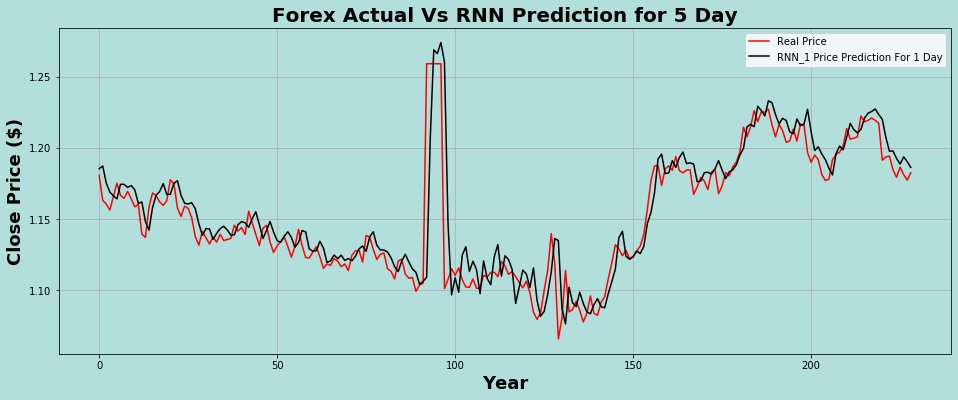

In [40]:
plt.figure(figsize = (16,6), facecolor = '#b2dfdb')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#b2dfdb')
#plt.figure(figsize=(16,8))
plt.plot(y_test_1, color = 'red', label = 'Real Price')
plt.plot(RNN_1_Price_Prediction_1, color = 'black', label = 'RNN_1 Price Prediction For 1 Day')
plt.title('Forex Actual Vs RNN Prediction for 5 Day', fontsize = 20,fontweight = "bold")
plt.xlabel('Year', fontsize = 18,fontweight = "bold")
plt.ylabel('Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [41]:
print ('R Squared =',r2_score(y_test_1, RNN_1_Price_Prediction_1))

R Squared = 0.7923367247620529


In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, RNN_1_Price_Prediction_1)) 

Mean Absolute Error: 0.01080223453931516


In [43]:
#def mean_absolute_percentage_error(y_test_1, RNN_1_Price_Prediction_1): 
    #y_test_1, RNN_1_Price_Prediction_1 = np.array(y_test_1), np.array(RNN_1_Price_Prediction_1)
    #return np.mean(np.abs((y_test_1 - RNN_1_Price_Prediction_1) / y_test_1)) * 100  
#print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_1, RNN_1_Price_Prediction_1))  

In [44]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, RNN_1_Price_Prediction_1))

Mean Squared Error: 0.00037270414816370257


In [45]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, RNN_1_Price_Prediction_1)))

Root Mean Squared Error: 0.01930554708273512


**Build LSTM Model**

In [46]:
#The LSTM Model Build
regressorLSTM_1 = Sequential()

regressorLSTM_1.add(LSTM(units=64, return_sequences=True, input_shape=(X_train_1.shape[1],1)))
regressorLSTM_1.add(Dropout(0.2))
regressorLSTM_1.add(LSTM(units=64))
regressorLSTM_1.add(Dropout(0.2))
regressorLSTM_1.add(Dense(units=1))
regressorLSTM_1.summary()

# Compiling the LSTM
regressorLSTM_1.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae', 'mse'])

# Fitting to the training set
history_1 = regressorLSTM_1.fit(X_train_1,y_train_1,epochs=100,batch_size=64)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 64)            16896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1001/1001 [==============================] - ETA: 34s - loss: 0.2781 - mae: 0.4853 - mse: 0.27 - ETA: 16

1001/1001 [==============================] - ETA: 1s - loss: 0.0061 - mae: 0.0591 - mse: 0.006 - ETA: 1s - loss: 0.0049 - mae: 0.0532 - mse: 0.004 - ETA: 1s - loss: 0.0048 - mae: 0.0534 - mse: 0.004 - ETA: 1s - loss: 0.0049 - mae: 0.0543 - mse: 0.004 - ETA: 1s - loss: 0.0048 - mae: 0.0541 - mse: 0.004 - ETA: 1s - loss: 0.0053 - mae: 0.0540 - mse: 0.005 - ETA: 1s - loss: 0.0053 - mae: 0.0545 - mse: 0.005 - ETA: 0s - loss: 0.0054 - mae: 0.0545 - mse: 0.005 - ETA: 0s - loss: 0.0052 - mae: 0.0538 - mse: 0.005 - ETA: 0s - loss: 0.0052 - mae: 0.0538 - mse: 0.005 - ETA: 0s - loss: 0.0055 - mae: 0.0544 - mse: 0.005 - ETA: 0s - loss: 0.0054 - mae: 0.0540 - mse: 0.005 - ETA: 0s - loss: 0.0054 - mae: 0.0536 - mse: 0.005 - ETA: 0s - loss: 0.0054 - mae: 0.0534 - mse: 0.005 - ETA: 0s - loss: 0.0057 - mae: 0.0539 - mse: 0.005 - 2s 2ms/step - loss: 0.0057 - mae: 0.0540 - mse: 0.0057
Epoch 10/100
1001/1001 [==============================] - ETA: 1s - loss: 0.0043 - mae: 0.0522 - mse: 0.004 - ETA: 1s - 

1001/1001 [==============================] - ETA: 1s - loss: 0.0034 - mae: 0.0428 - mse: 0.003 - ETA: 1s - loss: 0.0040 - mae: 0.0458 - mse: 0.004 - ETA: 1s - loss: 0.0062 - mae: 0.0540 - mse: 0.006 - ETA: 1s - loss: 0.0056 - mae: 0.0523 - mse: 0.005 - ETA: 1s - loss: 0.0051 - mae: 0.0508 - mse: 0.005 - ETA: 1s - loss: 0.0048 - mae: 0.0506 - mse: 0.004 - ETA: 1s - loss: 0.0049 - mae: 0.0516 - mse: 0.004 - ETA: 0s - loss: 0.0048 - mae: 0.0511 - mse: 0.004 - ETA: 0s - loss: 0.0050 - mae: 0.0515 - mse: 0.005 - ETA: 0s - loss: 0.0050 - mae: 0.0516 - mse: 0.005 - ETA: 0s - loss: 0.0051 - mae: 0.0523 - mse: 0.005 - ETA: 0s - loss: 0.0051 - mae: 0.0519 - mse: 0.005 - ETA: 0s - loss: 0.0053 - mae: 0.0515 - mse: 0.005 - ETA: 0s - loss: 0.0052 - mae: 0.0516 - mse: 0.005 - ETA: 0s - loss: 0.0052 - mae: 0.0520 - mse: 0.005 - 2s 2ms/step - loss: 0.0053 - mae: 0.0525 - mse: 0.0053
Epoch 19/100
1001/1001 [==============================] - ETA: 1s - loss: 0.0042 - mae: 0.0521 - mse: 0.004 - ETA: 1s - 

1001/1001 [==============================] - ETA: 1s - loss: 0.0041 - mae: 0.0455 - mse: 0.004 - ETA: 1s - loss: 0.0036 - mae: 0.0451 - mse: 0.003 - ETA: 1s - loss: 0.0038 - mae: 0.0462 - mse: 0.003 - ETA: 1s - loss: 0.0037 - mae: 0.0449 - mse: 0.003 - ETA: 1s - loss: 0.0036 - mae: 0.0446 - mse: 0.003 - ETA: 1s - loss: 0.0036 - mae: 0.0450 - mse: 0.003 - ETA: 1s - loss: 0.0039 - mae: 0.0451 - mse: 0.003 - ETA: 0s - loss: 0.0040 - mae: 0.0462 - mse: 0.004 - ETA: 0s - loss: 0.0044 - mae: 0.0472 - mse: 0.004 - ETA: 0s - loss: 0.0043 - mae: 0.0469 - mse: 0.004 - ETA: 0s - loss: 0.0043 - mae: 0.0475 - mse: 0.004 - ETA: 0s - loss: 0.0045 - mae: 0.0483 - mse: 0.004 - ETA: 0s - loss: 0.0043 - mae: 0.0473 - mse: 0.004 - ETA: 0s - loss: 0.0043 - mae: 0.0477 - mse: 0.004 - ETA: 0s - loss: 0.0044 - mae: 0.0482 - mse: 0.004 - 2s 2ms/step - loss: 0.0044 - mae: 0.0481 - mse: 0.0044
Epoch 28/100
1001/1001 [==============================] - ETA: 1s - loss: 0.0048 - mae: 0.0546 - mse: 0.004 - ETA: 1s - 

1001/1001 [==============================] - ETA: 1s - loss: 0.0030 - mae: 0.0431 - mse: 0.003 - ETA: 1s - loss: 0.0032 - mae: 0.0436 - mse: 0.003 - ETA: 1s - loss: 0.0039 - mae: 0.0466 - mse: 0.003 - ETA: 1s - loss: 0.0043 - mae: 0.0462 - mse: 0.004 - ETA: 1s - loss: 0.0042 - mae: 0.0465 - mse: 0.004 - ETA: 1s - loss: 0.0039 - mae: 0.0452 - mse: 0.003 - ETA: 1s - loss: 0.0040 - mae: 0.0461 - mse: 0.004 - ETA: 0s - loss: 0.0041 - mae: 0.0462 - mse: 0.004 - ETA: 0s - loss: 0.0044 - mae: 0.0469 - mse: 0.004 - ETA: 0s - loss: 0.0042 - mae: 0.0460 - mse: 0.004 - ETA: 0s - loss: 0.0041 - mae: 0.0458 - mse: 0.004 - ETA: 0s - loss: 0.0041 - mae: 0.0459 - mse: 0.004 - ETA: 0s - loss: 0.0041 - mae: 0.0453 - mse: 0.004 - ETA: 0s - loss: 0.0039 - mae: 0.0447 - mse: 0.003 - ETA: 0s - loss: 0.0040 - mae: 0.0453 - mse: 0.004 - 2s 2ms/step - loss: 0.0040 - mae: 0.0449 - mse: 0.0040
Epoch 37/100
1001/1001 [==============================] - ETA: 1s - loss: 0.0058 - mae: 0.0472 - mse: 0.005 - ETA: 1s - 

1001/1001 [==============================] - ETA: 1s - loss: 0.0045 - mae: 0.0499 - mse: 0.004 - ETA: 1s - loss: 0.0045 - mae: 0.0459 - mse: 0.004 - ETA: 1s - loss: 0.0037 - mae: 0.0426 - mse: 0.003 - ETA: 1s - loss: 0.0034 - mae: 0.0417 - mse: 0.003 - ETA: 1s - loss: 0.0034 - mae: 0.0424 - mse: 0.003 - ETA: 1s - loss: 0.0031 - mae: 0.0405 - mse: 0.003 - ETA: 0s - loss: 0.0030 - mae: 0.0402 - mse: 0.003 - ETA: 0s - loss: 0.0030 - mae: 0.0401 - mse: 0.003 - ETA: 0s - loss: 0.0030 - mae: 0.0406 - mse: 0.003 - ETA: 0s - loss: 0.0035 - mae: 0.0409 - mse: 0.003 - ETA: 0s - loss: 0.0037 - mae: 0.0418 - mse: 0.003 - ETA: 0s - loss: 0.0037 - mae: 0.0419 - mse: 0.003 - ETA: 0s - loss: 0.0036 - mae: 0.0418 - mse: 0.003 - ETA: 0s - loss: 0.0037 - mae: 0.0418 - mse: 0.003 - ETA: 0s - loss: 0.0036 - mae: 0.0415 - mse: 0.003 - 2s 2ms/step - loss: 0.0035 - mae: 0.0411 - mse: 0.0035
Epoch 46/100
1001/1001 [==============================] - ETA: 1s - loss: 0.0031 - mae: 0.0420 - mse: 0.003 - ETA: 1s - 

1001/1001 [==============================] - ETA: 2s - loss: 0.0030 - mae: 0.0404 - mse: 0.003 - ETA: 1s - loss: 0.0027 - mae: 0.0393 - mse: 0.002 - ETA: 1s - loss: 0.0028 - mae: 0.0406 - mse: 0.002 - ETA: 1s - loss: 0.0029 - mae: 0.0414 - mse: 0.002 - ETA: 1s - loss: 0.0029 - mae: 0.0404 - mse: 0.002 - ETA: 1s - loss: 0.0027 - mae: 0.0394 - mse: 0.002 - ETA: 1s - loss: 0.0026 - mae: 0.0388 - mse: 0.002 - ETA: 0s - loss: 0.0026 - mae: 0.0387 - mse: 0.002 - ETA: 0s - loss: 0.0031 - mae: 0.0403 - mse: 0.003 - ETA: 0s - loss: 0.0030 - mae: 0.0395 - mse: 0.003 - ETA: 0s - loss: 0.0032 - mae: 0.0404 - mse: 0.003 - ETA: 0s - loss: 0.0035 - mae: 0.0413 - mse: 0.003 - ETA: 0s - loss: 0.0034 - mae: 0.0415 - mse: 0.003 - ETA: 0s - loss: 0.0033 - mae: 0.0412 - mse: 0.003 - ETA: 0s - loss: 0.0034 - mae: 0.0414 - mse: 0.003 - 2s 2ms/step - loss: 0.0033 - mae: 0.0412 - mse: 0.0033
Epoch 55/100
1001/1001 [==============================] - ETA: 1s - loss: 0.0026 - mae: 0.0423 - mse: 0.002 - ETA: 1s - 

1001/1001 [==============================] - ETA: 1s - loss: 0.0022 - mae: 0.0368 - mse: 0.002 - ETA: 1s - loss: 0.0022 - mae: 0.0361 - mse: 0.002 - ETA: 1s - loss: 0.0038 - mae: 0.0399 - mse: 0.003 - ETA: 1s - loss: 0.0034 - mae: 0.0391 - mse: 0.003 - ETA: 1s - loss: 0.0032 - mae: 0.0383 - mse: 0.003 - ETA: 1s - loss: 0.0033 - mae: 0.0393 - mse: 0.003 - ETA: 1s - loss: 0.0031 - mae: 0.0388 - mse: 0.003 - ETA: 0s - loss: 0.0030 - mae: 0.0385 - mse: 0.003 - ETA: 0s - loss: 0.0030 - mae: 0.0386 - mse: 0.003 - ETA: 0s - loss: 0.0030 - mae: 0.0387 - mse: 0.003 - ETA: 0s - loss: 0.0032 - mae: 0.0390 - mse: 0.003 - ETA: 0s - loss: 0.0033 - mae: 0.0396 - mse: 0.003 - ETA: 0s - loss: 0.0032 - mae: 0.0391 - mse: 0.003 - ETA: 0s - loss: 0.0032 - mae: 0.0394 - mse: 0.003 - ETA: 0s - loss: 0.0031 - mae: 0.0389 - mse: 0.003 - 2s 2ms/step - loss: 0.0031 - mae: 0.0390 - mse: 0.0031
Epoch 64/100
1001/1001 [==============================] - ETA: 1s - loss: 0.0029 - mae: 0.0415 - mse: 0.002 - ETA: 1s - 

1001/1001 [==============================] - ETA: 1s - loss: 0.0022 - mae: 0.0341 - mse: 0.002 - ETA: 1s - loss: 0.0029 - mae: 0.0359 - mse: 0.002 - ETA: 1s - loss: 0.0027 - mae: 0.0357 - mse: 0.002 - ETA: 1s - loss: 0.0025 - mae: 0.0343 - mse: 0.002 - ETA: 1s - loss: 0.0025 - mae: 0.0352 - mse: 0.002 - ETA: 1s - loss: 0.0027 - mae: 0.0369 - mse: 0.002 - ETA: 1s - loss: 0.0026 - mae: 0.0363 - mse: 0.002 - ETA: 0s - loss: 0.0025 - mae: 0.0362 - mse: 0.002 - ETA: 0s - loss: 0.0025 - mae: 0.0365 - mse: 0.002 - ETA: 0s - loss: 0.0026 - mae: 0.0367 - mse: 0.002 - ETA: 0s - loss: 0.0026 - mae: 0.0368 - mse: 0.002 - ETA: 0s - loss: 0.0029 - mae: 0.0372 - mse: 0.002 - ETA: 0s - loss: 0.0029 - mae: 0.0375 - mse: 0.002 - ETA: 0s - loss: 0.0028 - mae: 0.0372 - mse: 0.002 - ETA: 0s - loss: 0.0029 - mae: 0.0376 - mse: 0.002 - 2s 2ms/step - loss: 0.0030 - mae: 0.0379 - mse: 0.0030
Epoch 73/100
1001/1001 [==============================] - ETA: 1s - loss: 0.0022 - mae: 0.0345 - mse: 0.002 - ETA: 1s - 

1001/1001 [==============================] - ETA: 1s - loss: 0.0017 - mae: 0.0322 - mse: 0.001 - ETA: 1s - loss: 0.0021 - mae: 0.0350 - mse: 0.002 - ETA: 1s - loss: 0.0020 - mae: 0.0350 - mse: 0.002 - ETA: 1s - loss: 0.0021 - mae: 0.0351 - mse: 0.002 - ETA: 1s - loss: 0.0022 - mae: 0.0355 - mse: 0.002 - ETA: 1s - loss: 0.0022 - mae: 0.0358 - mse: 0.002 - ETA: 1s - loss: 0.0025 - mae: 0.0360 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0357 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0357 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0358 - mse: 0.002 - ETA: 0s - loss: 0.0023 - mae: 0.0355 - mse: 0.002 - ETA: 0s - loss: 0.0023 - mae: 0.0355 - mse: 0.002 - ETA: 0s - loss: 0.0022 - mae: 0.0351 - mse: 0.002 - ETA: 0s - loss: 0.0022 - mae: 0.0351 - mse: 0.002 - ETA: 0s - loss: 0.0022 - mae: 0.0352 - mse: 0.002 - 2s 2ms/step - loss: 0.0026 - mae: 0.0361 - mse: 0.0026
Epoch 82/100
1001/1001 [==============================] - ETA: 1s - loss: 0.0018 - mae: 0.0322 - mse: 0.001 - ETA: 1s - 

1001/1001 [==============================] - ETA: 1s - loss: 0.0039 - mae: 0.0454 - mse: 0.003 - ETA: 1s - loss: 0.0029 - mae: 0.0393 - mse: 0.002 - ETA: 1s - loss: 0.0024 - mae: 0.0361 - mse: 0.002 - ETA: 1s - loss: 0.0023 - mae: 0.0359 - mse: 0.002 - ETA: 1s - loss: 0.0021 - mae: 0.0347 - mse: 0.002 - ETA: 1s - loss: 0.0024 - mae: 0.0349 - mse: 0.002 - ETA: 1s - loss: 0.0023 - mae: 0.0345 - mse: 0.002 - ETA: 0s - loss: 0.0022 - mae: 0.0337 - mse: 0.002 - ETA: 0s - loss: 0.0022 - mae: 0.0336 - mse: 0.002 - ETA: 0s - loss: 0.0022 - mae: 0.0338 - mse: 0.002 - ETA: 0s - loss: 0.0022 - mae: 0.0340 - mse: 0.002 - ETA: 0s - loss: 0.0025 - mae: 0.0348 - mse: 0.002 - ETA: 0s - loss: 0.0029 - mae: 0.0363 - mse: 0.002 - ETA: 0s - loss: 0.0028 - mae: 0.0360 - mse: 0.002 - ETA: 0s - loss: 0.0028 - mae: 0.0357 - mse: 0.002 - 2s 2ms/step - loss: 0.0027 - mae: 0.0354 - mse: 0.0027
Epoch 91/100
1001/1001 [==============================] - ETA: 1s - loss: 0.0016 - mae: 0.0327 - mse: 0.001 - ETA: 1s - 

1001/1001 [==============================] - ETA: 1s - loss: 0.0015 - mae: 0.0301 - mse: 0.001 - ETA: 1s - loss: 0.0016 - mae: 0.0304 - mse: 0.001 - ETA: 1s - loss: 0.0015 - mae: 0.0304 - mse: 0.001 - ETA: 1s - loss: 0.0017 - mae: 0.0312 - mse: 0.001 - ETA: 1s - loss: 0.0019 - mae: 0.0323 - mse: 0.001 - ETA: 1s - loss: 0.0020 - mae: 0.0333 - mse: 0.002 - ETA: 1s - loss: 0.0020 - mae: 0.0334 - mse: 0.002 - ETA: 0s - loss: 0.0029 - mae: 0.0351 - mse: 0.002 - ETA: 0s - loss: 0.0030 - mae: 0.0353 - mse: 0.003 - ETA: 0s - loss: 0.0029 - mae: 0.0351 - mse: 0.002 - ETA: 0s - loss: 0.0029 - mae: 0.0355 - mse: 0.002 - ETA: 0s - loss: 0.0029 - mae: 0.0359 - mse: 0.002 - ETA: 0s - loss: 0.0028 - mae: 0.0359 - mse: 0.002 - ETA: 0s - loss: 0.0027 - mae: 0.0355 - mse: 0.002 - ETA: 0s - loss: 0.0028 - mae: 0.0354 - mse: 0.002 - 2s 2ms/step - loss: 0.0028 - mae: 0.0356 - mse: 0.0028
Epoch 100/100
1001/1001 [==============================] - ETA: 1s - loss: 0.0043 - mae: 0.0405 - mse: 0.004 - ETA: 1s -

In [47]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date               
2018-01-11  1.21923
2018-01-16  1.22366
2018-01-21  1.23911
2018-01-26  1.23811
2018-01-31    1.251
...             ...
2021-07-04  1.17934
2021-07-09  1.18652
2021-07-14  1.18118
2021-07-19  1.17727
2021-07-24  1.18245

[259 rows x 1 columns]

In [48]:
y_test_1 = testing_length_1.iloc[30:, 0:].values
y_test_1

array([[1.180777],
       [1.163075],
       [1.160578],
       [1.156297],
       [1.165922],
       [1.175226],
       [1.1665889999999999],
       [1.164565],
       [1.1694129999999998],
       [1.164293],
       [1.158601],
       [1.160295],
       [1.139471],
       [1.137139],
       [1.15848],
       [1.168361],
       [1.166466],
       [1.162007],
       [1.159608],
       [1.162899],
       [1.1775930000000001],
       [1.1748530000000001],
       [1.157756],
       [1.151808],
       [1.159044],
       [1.1575280000000001],
       [1.150947],
       [1.137786],
       [1.1316700000000002],
       [1.141292],
       [1.136842],
       [1.13249],
       [1.137242],
       [1.133735],
       [1.139277],
       [1.134906],
       [1.1356540000000002],
       [1.136364],
       [1.145685],
       [1.141553],
       [1.143995],
       [1.139108],
       [1.1554950000000002],
       [1.147289],
       [1.1392639999999998],
       [1.13135],
       [1.143537],
       [1.145528],
 

In [49]:
testing_length_scaled_1 = sc.transform(testing_length_1)
testing_length_scaled_1

array([[0.32189849],
       [0.32981451],
       [0.35741607],
       [0.35563492],
       [0.37865765],
       [0.33412893],
       [0.35074346],
       [0.36112664],
       [0.34590202],
       [0.32171269],
       [0.34766709],
       [0.34232364],
       [0.34278456],
       [0.33254608],
       [0.35085243],
       [0.34164834],
       [0.33878457],
       [0.34514096],
       [0.34644512],
       [0.34927316],
       [0.33067024],
       [0.30948761],
       [0.28562522],
       [0.26024965],
       [0.27524917],
       [0.25096159],
       [0.23799332],
       [0.20524841],
       [0.22834082],
       [0.25096159],
       [0.25320187],
       [0.22157709],
       [0.21711618],
       [0.20946814],
       [0.22666328],
       [0.24328496],
       [0.22785489],
       [0.22423899],
       [0.23289999],
       [0.22375306],
       [0.21358425],
       [0.2166106 ],
       [0.17940834],
       [0.17524221],
       [0.21336809],
       [0.23102058],
       [0.22763514],
       [0.219

In [50]:
X_test_1 = [] 
length_1 = len(testing_length_1)
for i in range(30, length_1):
    X_test_1.append(testing_length_scaled_1[i-30:i, 0])    
X_test_1 = np.array(X_test_1)
X_test_1.shape

(229, 30)

In [51]:
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
X_test_1.shape

(229, 30, 1)

In [52]:
LSTM_1_Price_Prediction_1 = regressorLSTM_1.predict(X_test_1)
LSTM_1_Price_Prediction_1 = sc.inverse_transform(LSTM_1_Price_Prediction_1)

<function matplotlib.pyplot.show(*args, **kw)>

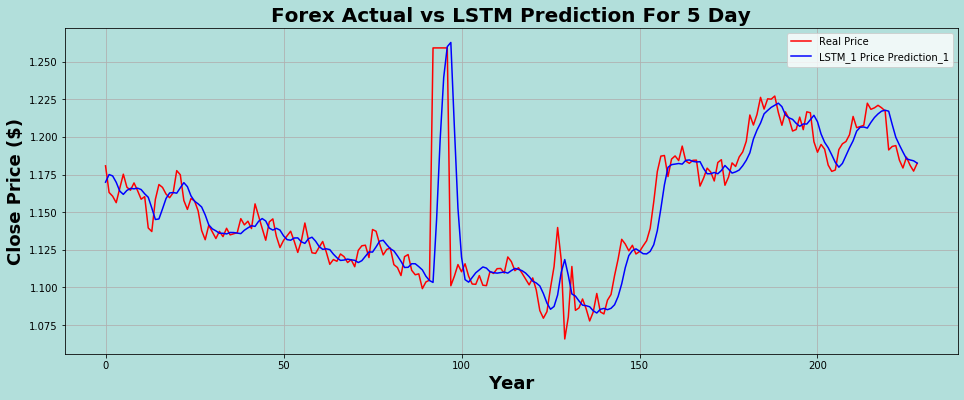

In [53]:
plt.figure(figsize = (16,6), facecolor = '#b2dfdb')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#b2dfdb')
#plt.figure(figsize=(16,8))
plt.plot(y_test_1, color = 'red', label = 'Real Price')
plt.plot(LSTM_1_Price_Prediction_1, color = 'blue', label = 'LSTM_1 Price Prediction_1')
plt.title('Forex Actual vs LSTM Prediction For 5 Day',fontweight = "bold",fontsize = 20)
plt.xlabel('Year', fontsize = 18,fontweight = "bold")
plt.ylabel('Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [54]:
print ('R Squared =',r2_score(y_test_1, LSTM_1_Price_Prediction_1))

R Squared = 0.740233682460764


In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, LSTM_1_Price_Prediction_1)) 

Mean Absolute Error: 0.010693842707871349


In [56]:
#def mean_absolute_percentage_error(y_test_1, LSTM_1_Price_Prediction_1): 
    #y_test_1, LSTM_1_Price_Prediction_1 = np.array(y_test_1), np.array(LSTM_1_Price_Prediction_1)
    #return np.mean(np.abs((y_test_1 - LSTM_1_Price_Prediction_1) / y_test_1)) * 100  
#print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_1, LSTM_1_Price_Prediction_1)) 

In [57]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, LSTM_1_Price_Prediction_1))

Mean Squared Error: 0.00046621620500373977


In [58]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, LSTM_1_Price_Prediction_1)))

Root Mean Squared Error: 0.021592040315906686


**Build GRU Model**

In [59]:
#The GRU Model Build
regressorGRU_1 = Sequential()

regressorGRU_1.add(GRU(units=256, return_sequences=True, input_shape=(X_train_1.shape[1],1)))
regressorGRU_1.add(Dropout(0.2))
regressorGRU_1.add(GRU(units=64))
regressorGRU_1.add(Dropout(0.2))
regressorGRU_1.add(Dense(units=1))
regressorGRU_1.summary()

# Compiling the GRU
regressorGRU_1.compile(optimizer='adam',loss='mean_squared_error' , metrics=['mae','mse'])

# Fitting to the training set
history_1 = (regressorGRU_1.fit(X_train_1,y_train_1,epochs=100,batch_size=64))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 30, 256)           198144    
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 256)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                61632     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 259,841
Trainable params: 259,841
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1001/1001 [==============================] - ETA: 37s - loss: 0.1715 - mae: 0.3729 - mse: 0.17 - ETA: 

1001/1001 [==============================] - ETA: 4s - loss: 0.0014 - mae: 0.0295 - mse: 0.001 - ETA: 4s - loss: 0.0047 - mae: 0.0391 - mse: 0.004 - ETA: 3s - loss: 0.0041 - mae: 0.0401 - mse: 0.004 - ETA: 3s - loss: 0.0037 - mae: 0.0393 - mse: 0.003 - ETA: 3s - loss: 0.0034 - mae: 0.0393 - mse: 0.003 - ETA: 2s - loss: 0.0033 - mae: 0.0391 - mse: 0.003 - ETA: 2s - loss: 0.0036 - mae: 0.0399 - mse: 0.003 - ETA: 2s - loss: 0.0035 - mae: 0.0400 - mse: 0.003 - ETA: 2s - loss: 0.0034 - mae: 0.0398 - mse: 0.003 - ETA: 1s - loss: 0.0034 - mae: 0.0404 - mse: 0.003 - ETA: 1s - loss: 0.0034 - mae: 0.0402 - mse: 0.003 - ETA: 1s - loss: 0.0033 - mae: 0.0398 - mse: 0.003 - ETA: 0s - loss: 0.0032 - mae: 0.0391 - mse: 0.003 - ETA: 0s - loss: 0.0032 - mae: 0.0396 - mse: 0.003 - ETA: 0s - loss: 0.0033 - mae: 0.0403 - mse: 0.003 - 5s 5ms/step - loss: 0.0033 - mae: 0.0403 - mse: 0.0033
Epoch 10/100
1001/1001 [==============================] - ETA: 4s - loss: 0.0028 - mae: 0.0404 - mse: 0.002 - ETA: 4s - 

1001/1001 [==============================] - ETA: 4s - loss: 0.0059 - mae: 0.0489 - mse: 0.005 - ETA: 4s - loss: 0.0045 - mae: 0.0442 - mse: 0.004 - ETA: 3s - loss: 0.0039 - mae: 0.0430 - mse: 0.003 - ETA: 3s - loss: 0.0036 - mae: 0.0428 - mse: 0.003 - ETA: 3s - loss: 0.0040 - mae: 0.0433 - mse: 0.004 - ETA: 2s - loss: 0.0039 - mae: 0.0429 - mse: 0.003 - ETA: 2s - loss: 0.0045 - mae: 0.0431 - mse: 0.004 - ETA: 2s - loss: 0.0042 - mae: 0.0421 - mse: 0.004 - ETA: 2s - loss: 0.0040 - mae: 0.0412 - mse: 0.004 - ETA: 1s - loss: 0.0039 - mae: 0.0408 - mse: 0.003 - ETA: 1s - loss: 0.0038 - mae: 0.0409 - mse: 0.003 - ETA: 1s - loss: 0.0037 - mae: 0.0406 - mse: 0.003 - ETA: 0s - loss: 0.0036 - mae: 0.0404 - mse: 0.003 - ETA: 0s - loss: 0.0034 - mae: 0.0395 - mse: 0.003 - ETA: 0s - loss: 0.0033 - mae: 0.0390 - mse: 0.003 - 5s 5ms/step - loss: 0.0033 - mae: 0.0388 - mse: 0.0033
Epoch 19/100
1001/1001 [==============================] - ETA: 4s - loss: 0.0021 - mae: 0.0377 - mse: 0.002 - ETA: 4s - 

1001/1001 [==============================] - ETA: 4s - loss: 0.0015 - mae: 0.0286 - mse: 0.001 - ETA: 4s - loss: 0.0019 - mae: 0.0313 - mse: 0.001 - ETA: 3s - loss: 0.0039 - mae: 0.0364 - mse: 0.003 - ETA: 3s - loss: 0.0034 - mae: 0.0352 - mse: 0.003 - ETA: 3s - loss: 0.0037 - mae: 0.0360 - mse: 0.003 - ETA: 2s - loss: 0.0034 - mae: 0.0360 - mse: 0.003 - ETA: 2s - loss: 0.0034 - mae: 0.0363 - mse: 0.003 - ETA: 2s - loss: 0.0032 - mae: 0.0358 - mse: 0.003 - ETA: 2s - loss: 0.0031 - mae: 0.0361 - mse: 0.003 - ETA: 1s - loss: 0.0030 - mae: 0.0364 - mse: 0.003 - ETA: 1s - loss: 0.0029 - mae: 0.0359 - mse: 0.002 - ETA: 1s - loss: 0.0028 - mae: 0.0356 - mse: 0.002 - ETA: 0s - loss: 0.0027 - mae: 0.0350 - mse: 0.002 - ETA: 0s - loss: 0.0027 - mae: 0.0354 - mse: 0.002 - ETA: 0s - loss: 0.0027 - mae: 0.0352 - mse: 0.002 - 5s 5ms/step - loss: 0.0028 - mae: 0.0355 - mse: 0.0028
Epoch 28/100
1001/1001 [==============================] - ETA: 4s - loss: 0.0023 - mae: 0.0364 - mse: 0.002 - ETA: 4s - 

1001/1001 [==============================] - ETA: 4s - loss: 0.0032 - mae: 0.0406 - mse: 0.003 - ETA: 4s - loss: 0.0028 - mae: 0.0385 - mse: 0.002 - ETA: 3s - loss: 0.0028 - mae: 0.0368 - mse: 0.002 - ETA: 3s - loss: 0.0027 - mae: 0.0359 - mse: 0.002 - ETA: 3s - loss: 0.0031 - mae: 0.0359 - mse: 0.003 - ETA: 2s - loss: 0.0029 - mae: 0.0358 - mse: 0.002 - ETA: 2s - loss: 0.0029 - mae: 0.0364 - mse: 0.002 - ETA: 2s - loss: 0.0028 - mae: 0.0360 - mse: 0.002 - ETA: 2s - loss: 0.0027 - mae: 0.0358 - mse: 0.002 - ETA: 1s - loss: 0.0029 - mae: 0.0364 - mse: 0.002 - ETA: 1s - loss: 0.0028 - mae: 0.0356 - mse: 0.002 - ETA: 1s - loss: 0.0028 - mae: 0.0358 - mse: 0.002 - ETA: 0s - loss: 0.0027 - mae: 0.0357 - mse: 0.002 - ETA: 0s - loss: 0.0026 - mae: 0.0354 - mse: 0.002 - ETA: 0s - loss: 0.0028 - mae: 0.0359 - mse: 0.002 - 5s 5ms/step - loss: 0.0027 - mae: 0.0358 - mse: 0.0027
Epoch 37/100
1001/1001 [==============================] - ETA: 4s - loss: 0.0027 - mae: 0.0382 - mse: 0.002 - ETA: 4s - 

1001/1001 [==============================] - ETA: 4s - loss: 0.0055 - mae: 0.0442 - mse: 0.005 - ETA: 4s - loss: 0.0034 - mae: 0.0363 - mse: 0.003 - ETA: 3s - loss: 0.0030 - mae: 0.0356 - mse: 0.003 - ETA: 3s - loss: 0.0032 - mae: 0.0355 - mse: 0.003 - ETA: 3s - loss: 0.0030 - mae: 0.0363 - mse: 0.003 - ETA: 2s - loss: 0.0030 - mae: 0.0366 - mse: 0.003 - ETA: 2s - loss: 0.0027 - mae: 0.0354 - mse: 0.002 - ETA: 2s - loss: 0.0026 - mae: 0.0350 - mse: 0.002 - ETA: 2s - loss: 0.0024 - mae: 0.0340 - mse: 0.002 - ETA: 1s - loss: 0.0024 - mae: 0.0340 - mse: 0.002 - ETA: 1s - loss: 0.0024 - mae: 0.0342 - mse: 0.002 - ETA: 1s - loss: 0.0024 - mae: 0.0348 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0348 - mse: 0.002 - ETA: 0s - loss: 0.0028 - mae: 0.0352 - mse: 0.002 - ETA: 0s - loss: 0.0027 - mae: 0.0349 - mse: 0.002 - 5s 5ms/step - loss: 0.0027 - mae: 0.0349 - mse: 0.0027
Epoch 46/100
1001/1001 [==============================] - ETA: 4s - loss: 0.0075 - mae: 0.0447 - mse: 0.007 - ETA: 4s - 

1001/1001 [==============================] - ETA: 4s - loss: 0.0043 - mae: 0.0383 - mse: 0.004 - ETA: 4s - loss: 0.0028 - mae: 0.0333 - mse: 0.002 - ETA: 3s - loss: 0.0034 - mae: 0.0346 - mse: 0.003 - ETA: 3s - loss: 0.0030 - mae: 0.0341 - mse: 0.003 - ETA: 3s - loss: 0.0030 - mae: 0.0360 - mse: 0.003 - ETA: 2s - loss: 0.0029 - mae: 0.0360 - mse: 0.002 - ETA: 2s - loss: 0.0027 - mae: 0.0356 - mse: 0.002 - ETA: 2s - loss: 0.0026 - mae: 0.0356 - mse: 0.002 - ETA: 2s - loss: 0.0026 - mae: 0.0353 - mse: 0.002 - ETA: 1s - loss: 0.0025 - mae: 0.0349 - mse: 0.002 - ETA: 1s - loss: 0.0025 - mae: 0.0347 - mse: 0.002 - ETA: 1s - loss: 0.0026 - mae: 0.0353 - mse: 0.002 - ETA: 0s - loss: 0.0025 - mae: 0.0351 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0346 - mse: 0.002 - ETA: 0s - loss: 0.0026 - mae: 0.0348 - mse: 0.002 - 5s 5ms/step - loss: 0.0026 - mae: 0.0348 - mse: 0.0026
Epoch 55/100
1001/1001 [==============================] - ETA: 4s - loss: 0.0016 - mae: 0.0315 - mse: 0.001 - ETA: 4s - 

1001/1001 [==============================] - ETA: 4s - loss: 0.0017 - mae: 0.0318 - mse: 0.001 - ETA: 4s - loss: 0.0029 - mae: 0.0357 - mse: 0.002 - ETA: 3s - loss: 0.0026 - mae: 0.0346 - mse: 0.002 - ETA: 3s - loss: 0.0023 - mae: 0.0338 - mse: 0.002 - ETA: 3s - loss: 0.0028 - mae: 0.0351 - mse: 0.002 - ETA: 3s - loss: 0.0026 - mae: 0.0340 - mse: 0.002 - ETA: 2s - loss: 0.0024 - mae: 0.0338 - mse: 0.002 - ETA: 2s - loss: 0.0025 - mae: 0.0343 - mse: 0.002 - ETA: 2s - loss: 0.0024 - mae: 0.0339 - mse: 0.002 - ETA: 1s - loss: 0.0023 - mae: 0.0333 - mse: 0.002 - ETA: 1s - loss: 0.0022 - mae: 0.0331 - mse: 0.002 - ETA: 1s - loss: 0.0022 - mae: 0.0330 - mse: 0.002 - ETA: 0s - loss: 0.0023 - mae: 0.0334 - mse: 0.002 - ETA: 0s - loss: 0.0023 - mae: 0.0331 - mse: 0.002 - ETA: 0s - loss: 0.0022 - mae: 0.0331 - mse: 0.002 - 5s 5ms/step - loss: 0.0023 - mae: 0.0333 - mse: 0.0023
Epoch 64/100
1001/1001 [==============================] - ETA: 4s - loss: 0.0021 - mae: 0.0342 - mse: 0.002 - ETA: 4s - 

1001/1001 [==============================] - ETA: 4s - loss: 0.0012 - mae: 0.0274 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0289 - mse: 0.001 - ETA: 3s - loss: 0.0014 - mae: 0.0290 - mse: 0.001 - ETA: 3s - loss: 0.0014 - mae: 0.0292 - mse: 0.001 - ETA: 3s - loss: 0.0015 - mae: 0.0299 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0302 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0305 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0306 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0299 - mse: 0.001 - ETA: 1s - loss: 0.0017 - mae: 0.0303 - mse: 0.001 - ETA: 1s - loss: 0.0018 - mae: 0.0303 - mse: 0.001 - ETA: 1s - loss: 0.0018 - mae: 0.0307 - mse: 0.001 - ETA: 0s - loss: 0.0018 - mae: 0.0308 - mse: 0.001 - ETA: 0s - loss: 0.0020 - mae: 0.0312 - mse: 0.002 - ETA: 0s - loss: 0.0023 - mae: 0.0320 - mse: 0.002 - 5s 5ms/step - loss: 0.0024 - mae: 0.0321 - mse: 0.0024
Epoch 73/100
1001/1001 [==============================] - ETA: 4s - loss: 0.0022 - mae: 0.0360 - mse: 0.002 - ETA: 4s - 

1001/1001 [==============================] - ETA: 4s - loss: 0.0012 - mae: 0.0265 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0280 - mse: 0.001 - ETA: 4s - loss: 0.0019 - mae: 0.0311 - mse: 0.001 - ETA: 3s - loss: 0.0022 - mae: 0.0323 - mse: 0.002 - ETA: 3s - loss: 0.0021 - mae: 0.0322 - mse: 0.002 - ETA: 3s - loss: 0.0021 - mae: 0.0323 - mse: 0.002 - ETA: 2s - loss: 0.0020 - mae: 0.0322 - mse: 0.002 - ETA: 2s - loss: 0.0020 - mae: 0.0320 - mse: 0.002 - ETA: 2s - loss: 0.0028 - mae: 0.0340 - mse: 0.002 - ETA: 1s - loss: 0.0027 - mae: 0.0341 - mse: 0.002 - ETA: 1s - loss: 0.0026 - mae: 0.0336 - mse: 0.002 - ETA: 1s - loss: 0.0024 - mae: 0.0331 - mse: 0.002 - ETA: 0s - loss: 0.0026 - mae: 0.0337 - mse: 0.002 - ETA: 0s - loss: 0.0025 - mae: 0.0333 - mse: 0.002 - ETA: 0s - loss: 0.0025 - mae: 0.0328 - mse: 0.002 - 5s 5ms/step - loss: 0.0024 - mae: 0.0327 - mse: 0.0024
Epoch 82/100
1001/1001 [==============================] - ETA: 4s - loss: 0.0015 - mae: 0.0299 - mse: 0.001 - ETA: 4s - 

1001/1001 [==============================] - ETA: 4s - loss: 0.0078 - mae: 0.0421 - mse: 0.007 - ETA: 4s - loss: 0.0047 - mae: 0.0356 - mse: 0.004 - ETA: 3s - loss: 0.0040 - mae: 0.0364 - mse: 0.004 - ETA: 3s - loss: 0.0032 - mae: 0.0331 - mse: 0.003 - ETA: 3s - loss: 0.0029 - mae: 0.0325 - mse: 0.002 - ETA: 2s - loss: 0.0026 - mae: 0.0314 - mse: 0.002 - ETA: 2s - loss: 0.0024 - mae: 0.0310 - mse: 0.002 - ETA: 2s - loss: 0.0024 - mae: 0.0312 - mse: 0.002 - ETA: 2s - loss: 0.0023 - mae: 0.0309 - mse: 0.002 - ETA: 1s - loss: 0.0021 - mae: 0.0305 - mse: 0.002 - ETA: 1s - loss: 0.0025 - mae: 0.0318 - mse: 0.002 - ETA: 1s - loss: 0.0025 - mae: 0.0317 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0315 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0315 - mse: 0.002 - ETA: 0s - loss: 0.0025 - mae: 0.0320 - mse: 0.002 - 5s 5ms/step - loss: 0.0025 - mae: 0.0319 - mse: 0.0025
Epoch 91/100
1001/1001 [==============================] - ETA: 4s - loss: 0.0046 - mae: 0.0371 - mse: 0.004 - ETA: 4s - 

1001/1001 [==============================] - ETA: 4s - loss: 0.0016 - mae: 0.0298 - mse: 0.001 - ETA: 4s - loss: 0.0014 - mae: 0.0283 - mse: 0.001 - ETA: 3s - loss: 0.0014 - mae: 0.0286 - mse: 0.001 - ETA: 3s - loss: 0.0013 - mae: 0.0280 - mse: 0.001 - ETA: 3s - loss: 0.0015 - mae: 0.0297 - mse: 0.001 - ETA: 2s - loss: 0.0019 - mae: 0.0310 - mse: 0.001 - ETA: 2s - loss: 0.0023 - mae: 0.0318 - mse: 0.002 - ETA: 2s - loss: 0.0022 - mae: 0.0314 - mse: 0.002 - ETA: 2s - loss: 0.0022 - mae: 0.0318 - mse: 0.002 - ETA: 1s - loss: 0.0023 - mae: 0.0317 - mse: 0.002 - ETA: 1s - loss: 0.0022 - mae: 0.0310 - mse: 0.002 - ETA: 1s - loss: 0.0021 - mae: 0.0307 - mse: 0.002 - ETA: 0s - loss: 0.0021 - mae: 0.0308 - mse: 0.002 - ETA: 0s - loss: 0.0020 - mae: 0.0304 - mse: 0.002 - ETA: 0s - loss: 0.0020 - mae: 0.0302 - mse: 0.002 - 5s 5ms/step - loss: 0.0020 - mae: 0.0302 - mse: 0.0020
Epoch 100/100
1001/1001 [==============================] - ETA: 4s - loss: 0.0021 - mae: 0.0327 - mse: 0.002 - ETA: 4s -

In [60]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date               
2018-01-11  1.21923
2018-01-16  1.22366
2018-01-21  1.23911
2018-01-26  1.23811
2018-01-31    1.251
...             ...
2021-07-04  1.17934
2021-07-09  1.18652
2021-07-14  1.18118
2021-07-19  1.17727
2021-07-24  1.18245

[259 rows x 1 columns]

In [61]:
y_test_1 = testing_length_1.iloc[30:, 0:].values
y_test_1

array([[1.180777],
       [1.163075],
       [1.160578],
       [1.156297],
       [1.165922],
       [1.175226],
       [1.1665889999999999],
       [1.164565],
       [1.1694129999999998],
       [1.164293],
       [1.158601],
       [1.160295],
       [1.139471],
       [1.137139],
       [1.15848],
       [1.168361],
       [1.166466],
       [1.162007],
       [1.159608],
       [1.162899],
       [1.1775930000000001],
       [1.1748530000000001],
       [1.157756],
       [1.151808],
       [1.159044],
       [1.1575280000000001],
       [1.150947],
       [1.137786],
       [1.1316700000000002],
       [1.141292],
       [1.136842],
       [1.13249],
       [1.137242],
       [1.133735],
       [1.139277],
       [1.134906],
       [1.1356540000000002],
       [1.136364],
       [1.145685],
       [1.141553],
       [1.143995],
       [1.139108],
       [1.1554950000000002],
       [1.147289],
       [1.1392639999999998],
       [1.13135],
       [1.143537],
       [1.145528],
 

In [62]:
testing_length_scaled_1 = sc.transform(testing_length_1)
testing_length_scaled_1

array([[0.32189849],
       [0.32981451],
       [0.35741607],
       [0.35563492],
       [0.37865765],
       [0.33412893],
       [0.35074346],
       [0.36112664],
       [0.34590202],
       [0.32171269],
       [0.34766709],
       [0.34232364],
       [0.34278456],
       [0.33254608],
       [0.35085243],
       [0.34164834],
       [0.33878457],
       [0.34514096],
       [0.34644512],
       [0.34927316],
       [0.33067024],
       [0.30948761],
       [0.28562522],
       [0.26024965],
       [0.27524917],
       [0.25096159],
       [0.23799332],
       [0.20524841],
       [0.22834082],
       [0.25096159],
       [0.25320187],
       [0.22157709],
       [0.21711618],
       [0.20946814],
       [0.22666328],
       [0.24328496],
       [0.22785489],
       [0.22423899],
       [0.23289999],
       [0.22375306],
       [0.21358425],
       [0.2166106 ],
       [0.17940834],
       [0.17524221],
       [0.21336809],
       [0.23102058],
       [0.22763514],
       [0.219

In [63]:
X_test_1 = [] 
length_1 = len(testing_length_1)
for i in range(30, length_1):
    X_test_1.append(testing_length_scaled_1[i-30:i, 0])    
X_test_1 = np.array(X_test_1)
X_test_1.shape  

(229, 30)

In [64]:
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
X_test_1.shape

(229, 30, 1)

In [65]:
GRU_1_Price_Prediction_1 = regressorGRU_1.predict(X_test_1)
GRU_1_Price_Prediction_1 = sc.inverse_transform(GRU_1_Price_Prediction_1)

<function matplotlib.pyplot.show(*args, **kw)>

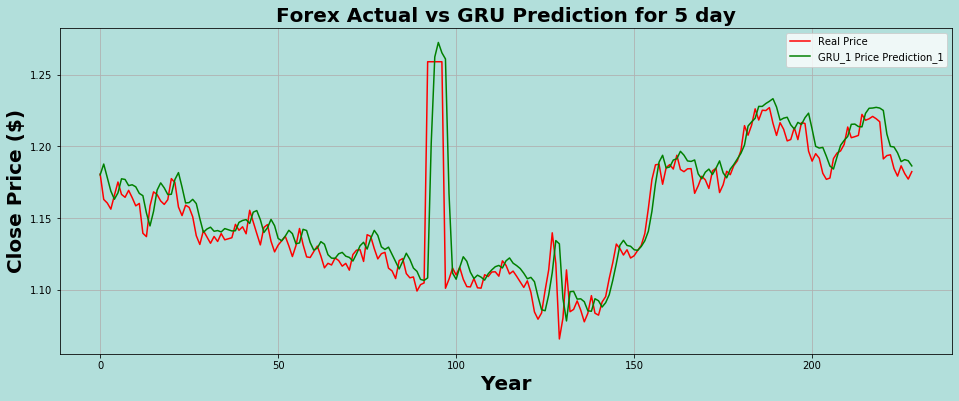

In [66]:
plt.figure(figsize = (16,6), facecolor = '#b2dfdb')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#b2dfdb')
#plt.figure(figsize=(16,8))
plt.plot(y_test_1, color = 'red', label = 'Real Price')
plt.plot(GRU_1_Price_Prediction_1, color = 'green', label = 'GRU_1 Price Prediction_1')
plt.title('Forex Actual vs GRU Prediction for 5 day',fontweight = "bold",fontsize = 20)
plt.xlabel('Year', fontsize = 20,fontweight = "bold")
plt.ylabel('Close Price ($)', fontsize = 20,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [67]:
print ('R Squared =',r2_score(y_test_1, GRU_1_Price_Prediction_1))

R Squared = 0.7881574036746066


In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, GRU_1_Price_Prediction_1)) 

Mean Absolute Error: 0.01081533560537146


In [69]:
#def mean_absolute_percentage_error(y_test_1, GRU_1_Price_Prediction_1): 
    #y_test_1, GRU_1_Price_Prediction_1 = np.array(y_test_1), np.array(GRU_1_Price_Prediction_1)
    #return np.mean(np.abs((y_test_1 - GRU_1_Price_Prediction_1) / y_test_1)) * 100  
#print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_1, GRU_1_Price_Prediction_1)) 

In [70]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, GRU_1_Price_Prediction_1))

Mean Squared Error: 0.00038020499444484904


In [71]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, GRU_1_Price_Prediction_1)))

Root Mean Squared Error: 0.019498845977258476


# **The End of  5 Day Price Prediction**
